# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
df_descript = df.describe()
df_descript

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,Yanino village,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,Pargolovo village,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Saint Peterburg,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,Murino village,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Saint Peterburg,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Conclusion

I read the .csv file and set the seperator to '\t' to properly format the data set. Then, I printed the dataframe's info to see which columns needed to be adressed in pre-processing, the description of the data's values to use during pre-processing, and the first 20 values to see examples of the data.

### Step 2. Data preprocessing

In [4]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

Converted dates to datetime64 data type to help with later preprocessing.

In [5]:
ceiling_height_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(value=ceiling_height_median)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

Filled null values in the 'ceiling_height' column with median value. This helps to mitigate the effect had on the mean by high value homes with abnormally tall ceilings.

In [6]:
df.query('floors_total == "NaN"').max()
df['floors_total'] = df['floors_total'].fillna(value=24).copy()
df['floors_total'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

I used a data slice to find the highest floor of the apartments that do not have a 'floors_total' recorded. I filled all NaN values in the 'floors_total' column with the max, that way the number of floors is never less than the floor the listed apartment is on and we can still use the rows that were affected by the missing values.

## Review

Good idea but this can give you some bias when you categorize flats to ground floor, last floor, and others.

---

In [7]:
tiny_living_nan = df.query('total_area < 40 & living_area == "NaN"').copy()
tiny_living_nan['living_area'] = tiny_living_nan['living_area'].fillna(value=2).copy()
small_living_nan = df.query('total_area >= 40 & total_area < 52 & living_area == "NaN"').copy()
small_living_nan['living_area'] = small_living_nan['living_area'].fillna(value=18.6).copy()
living_nan1 = tiny_living_nan.combine_first(small_living_nan)
med_living_nan = df.query('total_area >= 52 & total_area < 69 & living_area == "NaN"').copy()
med_living_nan['living_area'] = med_living_nan['living_area'].fillna(value=30).copy()
large_living_nan = df.query('total_area >= 69 & living_area == "NaN"').copy()
large_living_nan['living_area'] = large_living_nan['living_area'].fillna(value=42.3).copy()
living_nan2 = med_living_nan.combine_first(large_living_nan)
living_nan_fix = living_nan1.combine_first(living_nan2)


df = df.combine_first(living_nan_fix)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

For the null values in the living_area column I seperated the rows with a null living_area value into four groups based on total_area quartiles. I then filled the null vales with minimum living_area for the lowest quartile and then up from there 25%, 50%, 75%, respectively. this allows us to keep the data these listings provide and grouping the data before filling values keeps the overall data accurate.

In [8]:
df = df.drop('is_apartment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000        18181 non-null float64
ponds

I removed the is_apartment column because it is not relevant in regards to our calculations.

In [9]:
tiny_kitchen_nan = df.query('total_area < 40 & kitchen_area == "NaN"').copy()
tiny_kitchen_nan['kitchen_area'] = tiny_kitchen_nan['kitchen_area'].fillna(value=1.3).copy()
small_kitchen_nan = df.query('total_area >= 40 & total_area < 52 & kitchen_area == "NaN"').copy()
small_kitchen_nan['kitchen_area'] = small_kitchen_nan['kitchen_area'].fillna(value=7).copy()
kitchen_nan1 = tiny_kitchen_nan.combine_first(small_kitchen_nan)
med_kitchen_nan = df.query('total_area >= 52 & total_area < 69 & kitchen_area == "NaN"').copy()
med_kitchen_nan['kitchen_area'] = med_kitchen_nan['kitchen_area'].fillna(value=9.1).copy()
large_kitchen_nan = df.query('total_area >= 69 & kitchen_area == "NaN"').copy()
large_kitchen_nan['kitchen_area'] = large_kitchen_nan['kitchen_area'].fillna(value=12).copy()
kitchen_nan2 = med_kitchen_nan.combine_first(large_kitchen_nan)
kitchen_nan_fix = kitchen_nan1.combine_first(kitchen_nan2)

df = df.combine_first(kitchen_nan_fix)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000        18181 non-null float64
ponds

I used the same method to fill null values here that i used in the living_area column

In [10]:
df['balcony'] = df['balcony'].fillna(value=0).astype(int).copy()


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000        18181 non-null float64
ponds_n

I replaced the null values with zero to indicate that these apartments have no balconys. I then converted the data type to int because it is not possible to have a fraction of a balcony and that will help calculations.

In [11]:
df = df.dropna(subset=['locality_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000        18140 non-null float64
ponds_n

I deleted the rows for listings without a locality. this will help the future calculations that i need to make, and it doesnt sacrifice enough data to make a significant difference in my final cslculations.

In [12]:
df['airports_nearest'] = df['airports_nearest'].fillna(value=85000)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value=66000)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)
df['parks_nearest'] = df['parks_nearest'].fillna(value=3500)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=3500)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around3000        23650 non-null int64
ponds_near

I filled null values in the airports_nearest and cityCenters_nearest columns with the max values for each columns rounded up to the nearest thousand (i.e., 85,000 and 66,000). This way we can maintain info for these districts to get an accurate picture of listings in this district. For ponds_nearest and parks_nearest I changed the null values to 3500 and i replaced the null values in ponds_around3000 to 0 to symbolize that there were no parks or ponds within a 3km radius. There seemed to be null values for parks, ponds, airports, and distance to the city center for the same districts which leads me to believe that there is a bug in the recording of data for these dictricts.

In [13]:
import numpy as np
end_date = df['first_day_exposition'].max()
days_null = df.query('days_exposition == "NaN"').copy()
days_null['days_exposition'] = end_date - days_null['first_day_exposition']
days_null['days_exposition'] = days_null['days_exposition'] / np.timedelta64(1, 'D')
df = df.combine_first(days_null).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around3000        23650 non-null int64
ponds_near

For the days_exposition column I looked at the rows with null values and compared them to the rows with a value recorded and it seemed as if the listings that were still active did not have a value recorded in the days_exposition column. I made a data slice if just the rows with a null value in the days_exposition column. Then I calculated the number of days between the latest date in the first_day_exposition column and the corresponding date for each row in the first_day_exposition column. I converted the data type to a float to match the original dataframe and merged the slice wtih the original dataframe. The data is now cleaned up and ready for futher calculations, and analysis.

### Step 3. Make calculations and add them to the table

In [14]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['dayof_day_exposition'] = df['first_day_exposition'].dt.dayofweek
def floor_first_or_last(row):
    total = row['floors_total']
    floor = row['floor']
    if floor == total:
        return 3
    if floor == 1:
        return 1
    return 2
df['floor_group'] = df.apply(floor_first_or_last, axis=1)
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']
df['living_ratio'] = df['living_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,dayof_day_exposition,floor_group,kitchen_ratio,living_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,57.0,120370.370370,3,2,0.231481,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,3500.0,0,3500.0,81.0,82920.792079,1,1,0.272277,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,3,2,0.148214,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,42.3,9,False,...,2,84.0,3,234.0,424.0,408176.100629,4,2,0.075472,0.266038
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,1,2,0.410000,0.320000


I calculated the price per sqaure meter by dividing the last_price of the apartment by the total_area. I used the day_name method to find the day of the week that the listing was made on then converted the day and first expostion date to strings so i cpuld concatenate them. i created a function that assigned each apartment to a group based off of which floor it was on (first, last, or other). i then calulated the ratio of the kitchen to the total area and the living area to the total area and put those values in a new column.

### Step 4. Conduct exploratory data analysis and follow the instructions below:

   total_area  last_price  rooms  ceiling_height
0       108.0  13000000.0      3            2.70
1        40.4   3350000.0      1            2.65
2        56.0   5196000.0      2            2.65
3       159.0  64900000.0      3            2.65
4       100.0  10000000.0      2            3.03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ca4cf2510>]],
      dtype=object)

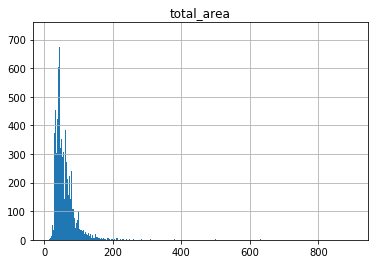

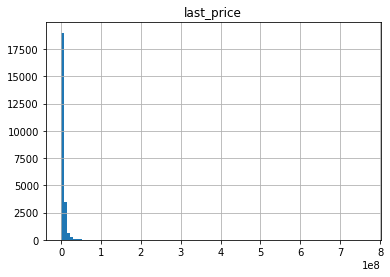

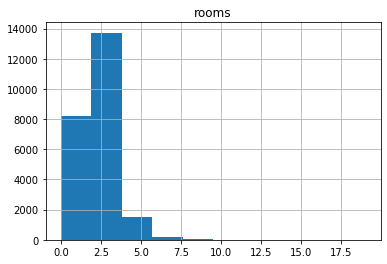

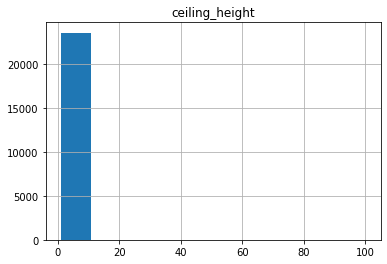

In [15]:
df_slice1 = df[['total_area', 'last_price', 'rooms', 'ceiling_height']]
print(df_slice1.head())
df.hist('total_area', bins=1000)
df.hist('last_price', bins=100)
df.hist('rooms', bins=10)
df.hist('ceiling_height', bins=10)

Avg length of exposition 185.71441860465117
Median length of exposition 94.0


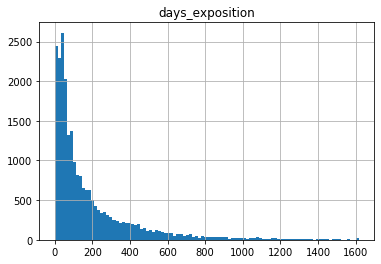

In [16]:
df.hist('days_exposition', bins=100)
print('Avg length of exposition', df['days_exposition'].mean())
print('Median length of exposition', df["days_exposition"].median())

There is a large difference between the mean and median length of exposition due to abnormally long expositions on some apartments. In this case I would use the median as the threshold and consider apartments that sold in lesa than 94 days a quick sale.

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
19865    180000000.0
19155    160000000.0
2536     159984000.0
16495    159000000.0
1026     155000000.0
7857     150000000.0
15016    150000000.0
22229    148000000.0
3117     140000000.0
12674    140000000.0
Name: last_price, dtype: float64

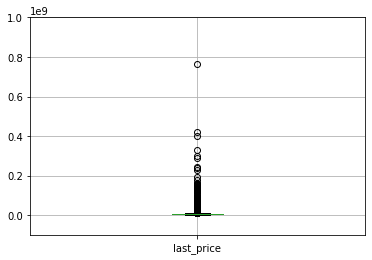

In [17]:
import matplotlib.pyplot as plt
#df.boxplot(figsize=(24, 6), rot=45)
df.boxplot(column='last_price')
plt.ylim(-100000000, 1000000000)
df['last_price'].sort_values(ascending=False).head(20)

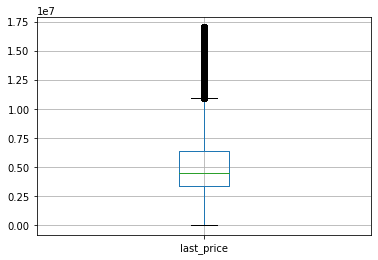

In [18]:
last_price_iqr = df_descript.loc['75%', 'last_price'] - df_descript.loc['25%', 'last_price']
last_price_fence = last_price_iqr * 3 + df_descript.loc['75%', 'last_price']
df = df.query('last_price <= @last_price_fence')
df.boxplot(column='last_price')

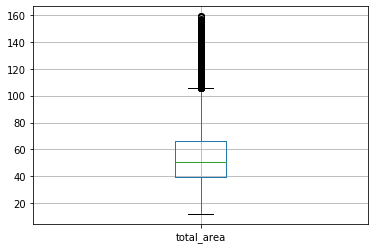

In [19]:
total_area_iqr = df_descript.loc['75%', 'total_area'] - df_descript.loc['25%', 'total_area']
total_area_fence = total_area_iqr * 3 + df_descript.loc['75%', 'total_area']
df = df.query('total_area <= @total_area_fence')
df.boxplot(column='total_area')

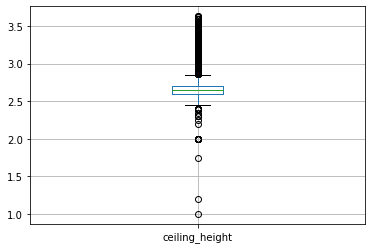

In [20]:
ceiling_iqr = df_descript.loc['75%', 'ceiling_height'] - df_descript.loc['25%', 'ceiling_height']
ceiling_fence = ceiling_iqr * 3 + df_descript.loc['75%', 'ceiling_height']
df = df.query('ceiling_height <= @ceiling_fence')
df.boxplot(column='ceiling_height')

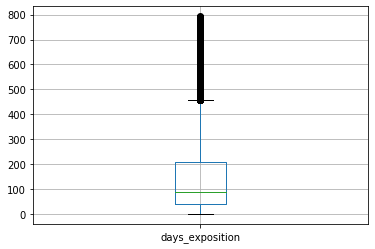

In [21]:
days_iqr = df_descript.loc['75%', 'days_exposition'] - df_descript.loc['25%', 'days_exposition']
days_fence = days_iqr * 3 + df_descript.loc['75%', 'days_exposition']
df = df.query('days_exposition <= @days_fence')
df.boxplot(column='days_exposition')

In [22]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21789 entries, 0 to 21788
Data columns (total 26 columns):
total_images              21789 non-null int64
last_price                21789 non-null float64
total_area                21789 non-null float64
first_day_exposition      21789 non-null datetime64[ns]
rooms                     21789 non-null int64
ceiling_height            21789 non-null float64
floors_total              21789 non-null float64
living_area               21789 non-null float64
floor                     21789 non-null int64
studio                    21789 non-null bool
open_plan                 21789 non-null bool
kitchen_area              21789 non-null float64
balcony                   21789 non-null int64
locality_name             21789 non-null object
airports_nearest          21789 non-null float64
cityCenters_nearest       21789 non-null float64
parks_around3000          21789 non-null int64
parks_nearest             21789 non-null float64
ponds_around3000   

I found potential outliers in the last price, total area, ceiling height, and days_exposition column. These listings skew the data and dont give us an accurate picture of the apartments for sale. i calculated the upper fence for each column and removed the major outliers that were greater than the upper fence.

                      last_price  total_area     rooms  cityCenters_nearest  \
last_price              1.000000    0.756968  0.485400            -0.508351   
total_area              0.756968    1.000000  0.801931            -0.182808   
rooms                   0.485400    0.801931  1.000000            -0.112430   
cityCenters_nearest    -0.508351   -0.182808 -0.112430             1.000000   
dayof_day_exposition   -0.012080   -0.006256 -0.000298             0.003416   
floor_group             0.043962    0.027836 -0.000246             0.003653   

                      dayof_day_exposition  floor_group  
last_price                       -0.012080     0.043962  
total_area                       -0.006256     0.027836  
rooms                            -0.000298    -0.000246  
cityCenters_nearest               0.003416     0.003653  
dayof_day_exposition              1.000000     0.003925  
floor_group                       0.003925     1.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ca4cb4650>,
      dtype=object)

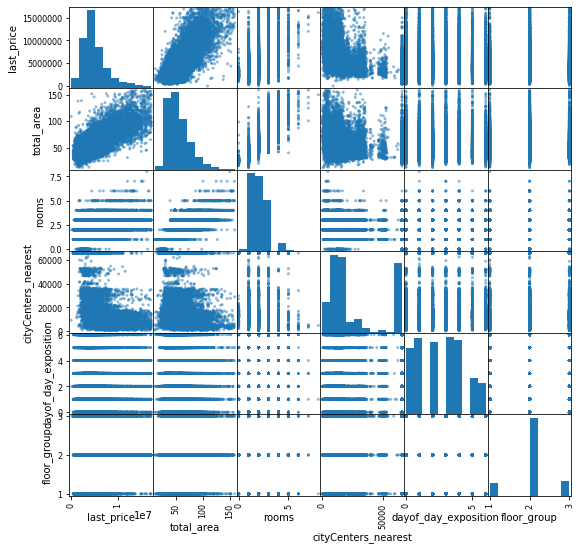

In [24]:
price_corr = df.filter(['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'dayof_day_exposition', 'floor_group'], axis=1)
print(price_corr.corr())
pd.plotting.scatter_matrix(price_corr, figsize=(9, 9))

I made a dataframe with the columns that could have an effect on price. then i calculated the correlation for each value and created a scatter matrix to see any correlation. I found that total_area and rooms have the highest correlation with price. Which makes sense considering the two values that have the highest correlation to each other are the number of rooms and the total area of the apartment.

Saint Peterburg      14147
Murino village         541
Shushary village       432
Vsevolozhsk            380
Pushkin                342
Kolpino                331
Pargolovo village      320
Gatchina               293
Kudrovo village        288
Vyborg                 224
Name: locality_name, dtype: int64


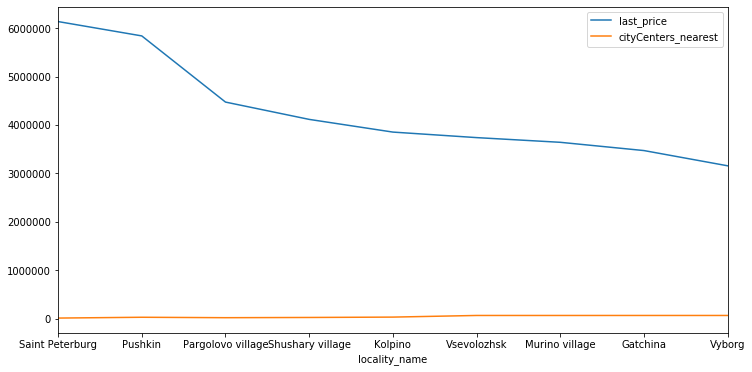

In [46]:
print(df['locality_name'].value_counts().head(10))
pop_locality = df.query('locality_name == "Saint Peterburg" or locality_name == "Murino village" or locality_name == "Shushary village" or locality_name == "Vsevolozhsk" or locality_name == "Pushkin" or locality_name == "Kolpino" or locality_name == "Pargolovo village" or locality_name == "Gatchina" or locality_name == "Kudrovo village" or locality_name == "Vyborg"')
pop_locality = pop_locality.groupby('locality_name').mean().sort_values('last_price', ascending=False)
pop_locality = pop_locality.filter(['last_price', 'cityCenters_nearest'])
pop_locality.plot(figsize=(12, 6))


I seperated the 10 most popular localitys and filtered out all columns except for the price and the distance to downtown. As you can see the highest average price is homes in Saint Petersburg and the price begins to drop rapidly the further you get from Saint Petersburg. Therefore the closer you are to Saint Petersburg the more you can expect to pay for an apartment.

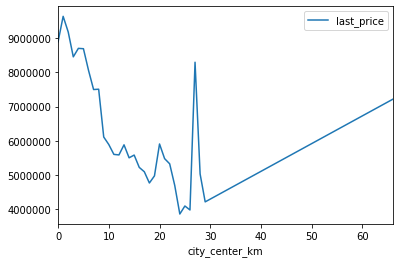

In [63]:
saint_petersburg = df.query("locality_name == 'Saint Peterburg'").copy()
saint_petersburg['city_center_km'] = saint_petersburg['cityCenters_nearest'] / 1000
saint_petersburg['city_center_km'] = saint_petersburg['city_center_km'].round()
saint_petersburg_distance = saint_petersburg.filter(['city_center_km', 'last_price']).copy()
saint_petersburg_distance = saint_petersburg_distance.groupby('city_center_km').mean()
saint_petersburg_distance.plot()

According to the above graph the border of downtown should be around 27km from the center. the prices seem to rise back up and it may be due to another expensive neighborhood about 27km from downtown.

                      last_price  total_area     rooms  ceiling_height  \
last_price              1.000000    0.822026  0.539514        0.395728   
total_area              0.822026    1.000000  0.797511        0.343960   
rooms                   0.539514    0.797511  1.000000        0.169606   
ceiling_height          0.395728    0.343960  0.169606        1.000000   
floor_group             0.069175    0.035797 -0.001842        0.033600   
city_center_km         -0.384871   -0.276661 -0.211159       -0.397859   
dayof_day_exposition   -0.005424   -0.003326 -0.003512       -0.023990   

                      floor_group  city_center_km  dayof_day_exposition  
last_price               0.069175       -0.384871             -0.005424  
total_area               0.035797       -0.276661             -0.003326  
rooms                   -0.001842       -0.211159             -0.003512  
ceiling_height           0.033600       -0.397859             -0.023990  
floor_group              1.000000    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c99de5450>,
      dtype=object)

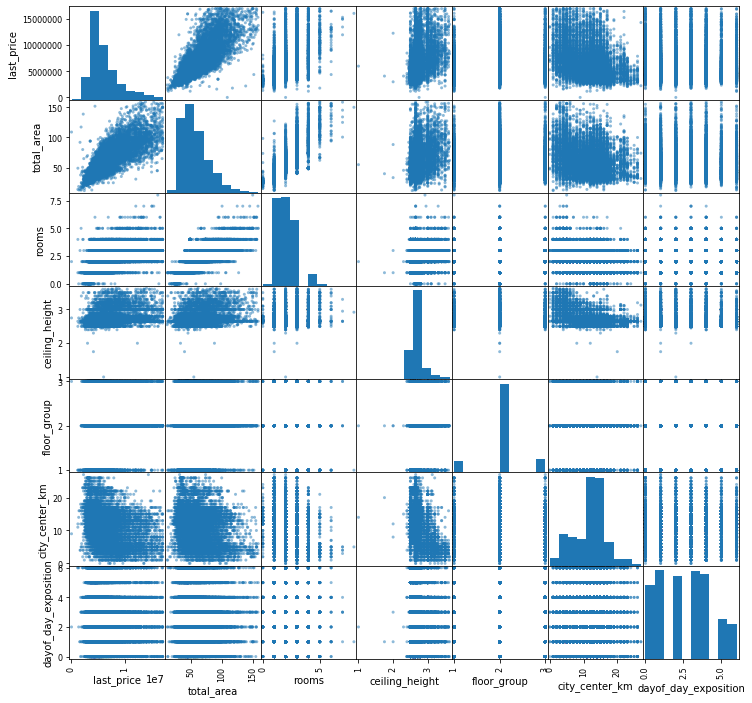

In [65]:
downtown = saint_petersburg.query('city_center_km <= 27')
downtown_corr = downtown.filter(['last_price', 'total_area', 'rooms', 'ceiling_height', 'floor_group', 'city_center_km', 'dayof_day_exposition'])
print(downtown_corr.corr())
pd.plotting.scatter_matrix(downtown_corr, figsize=(12, 12))

I calculated the correlation between price and the parameters known to have and effect on price. i found a strong correlation between price and total area, number of rooms, ceiling height, and distance to city center. This shows even when you shrink the sample size the same factors affect price.

### Step 5. Overall conclusion

Overall I found that the factors affecting price are not only the same for the whole of Saint Petersburg and the surrounding areas, you can see the same trends in each locality. this way it will be easy to identify suspicious post because even if there is no apartment excatly like it, you can take the total area and geographic location of the apartment and estimate what the market value should be. After that we can build a system that only allows for a certain amount of deviation from the estinate before it is flagged as a potentially fraudulent posting.